#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [ ]:
# Read Text Files with Pandas using read_csv()
  
# importing pandas
import matplotlib.pyplot as plt
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_csv("imdb_top_10000.txt", delimiter="\t", header=None, names=['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])
df

imdbID                            title  year  score   votes  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [ ]:
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [ ]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [ ]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [ ]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.genres.isna() == True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [ ]:
df.shape

(10000, 7)

In [ ]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['genres'], inplace=True)

In [ ]:
df.shape

(9999, 7)

## 2. Asking Questions

Which are the top 10 genres of movies? 

# 3. Parsing and Completing the DataFrame
There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [ ]:

runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()


imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [ ]:
genre_set = set()
for genre in df.genres:
  genre_set.update(genre.split('|'))


In [ ]:
len(genre_set)

24

In [ ]:
for genre in genre_set:
  df[genre] = [genre in row.split("|") for row in df.genres]

In [ ]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Musical  Western  Adventure  ...   News  \
0                       Crime|Drama    False    False      False  ...  False   
1                    Crime|Thriller    False    False      False  ...  False   
2            Drama|Mystery|Thriller    False    False      False  ...  False   
3           Action|Adventure|Sci-Fi    False    False       True  ...  False   
4  Action|Adventure|Sci-Fi|Thriller    False    False       True  ...  False   

   Fantasy  Thriller  Family  Action  Reality-TV  Sci-Fi  Mystery  Biography  \
0    False     False   False   False       False   False    False      False   
1    False      True   False   False       False   False    False      False   
2    False      True   False   False       False   False     True      False   
3    False     False   False    True       False    True    False      False   
4    False      True   False    True       False    True    False      False   

   Comedy  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 31 columns]

In [ ]:
title = [title.split(" (")[0] for title in df.title]
df['title'] = title
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Musical  Western  Adventure  ...   News  \
0                       Crime|Drama    False    False      False  ...  False   
1                    Crime|Thriller    False    False      False  ...  False   
2            Drama|Mystery|Thriller    False    False      False  ...  False   
3           Action|Adventure|Sci-Fi    False    False       True  ...  False   
4  Action|Adventure|Sci-Fi|Thriller    False    False       True  ...  False   

   Fantasy  Thriller  Family  Action  Reality-TV  Sci-Fi  Mystery  Biography  \
0    False     False   False   False       False   False    False      False   
1    False      True   False   False       False   False    False      False   
2    False      True   False   False       False   False     True      False   
3    False     False   False    True       False    True    False      False   
4    False      True   False    True       False    True    False      False   

   Comedy  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 31 columns]

## 4. EDA

Univariate(One Variable)

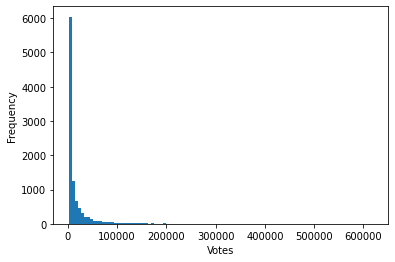

In [ ]:
# plot histogram of votes
import matplotlib.pyplot as plt
%matplotlib inline
x = df.votes
plt.hist(x, bins=100)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()


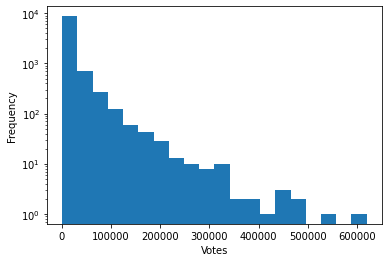

In [55]:
 # apply logscale for histogram when the graph doesn't show properly
import matplotlib.pyplot as plt
%matplotlib inline
x = df.votes
plt.hist(x,bins=20, log=True)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()

Multivariate(Bivariate)

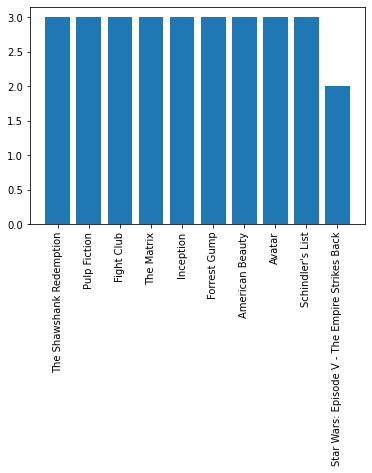

In [56]:
x = df.title.unique()[:10]
y = df.title.value_counts()[:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Barplot

In [57]:
yeardf = df.groupby("year")
df2002 = yeardf.get_group(2002)
plt.boxplot(df2002.votes,vert=False)
plt.show()

## 5. Determining Best Movies

In [ ]:
#Deterime best movie each year based on score. 
movies = df.groupby('year', sort = False)



In [ ]:
year_2010 = movies.get_group(2010)

In [ ]:
best_movie = year_2010[year_2010['score']==year_2010.score.max()]
print(best_movie)

      imdbID      title  year  score   votes  runtime  \
4  tt1375666  Inception  2010    8.9  385149      148   

                             genres  Musical  Western  Adventure  ...   News  \
4  Action|Adventure|Sci-Fi|Thriller    False    False       True  ...  False   

   Fantasy  Thriller  Family  Action  Reality-TV  Sci-Fi  Mystery  Biography  \
4    False      True   False    True       False    True    False      False   

   Comedy  
4   False  

[1 rows x 31 columns]


## 6. Trends in Popularity of Genres

In [ ]:
genredf = df[list(genre_set)]
genredf.head()

Musical  Western  Adventure  Music  Film-Noir  Horror  Crime  History  \
0    False    False      False  False      False   False   True    False   
1    False    False      False  False      False   False   True    False   
2    False    False      False  False      False   False  False    False   
3    False    False       True  False      False   False  False    False   
4    False    False       True  False      False   False  False    False   

   Sport  Romance  ...   News  Fantasy  Thriller  Family  Action  Reality-TV  \
0  False    False  ...  False    False     False   False   False       False   
1  False    False  ...  False    False      True   False   False       False   
2  False    False  ...  False    False      True   False   False       False   
3  False    False  ...  False    False     False   False    True       False   
4  False    False  ...  False    False      True   False    True       False   

   Sci-Fi  Mystery  Biography  Comedy  
0   False    False      False   False  
1   False    False      False   False  
2   False     True      False   False  
3    True    False      False   False  
4    True    False      False   False  

[5 rows x 24 columns]

In [ ]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

In [ ]:
plt.bar(x, y)
plt.xlabel("Genres")
plt.xticks(rotation=90) # to avoid overlapping categories name
plt.show()
